<a href="https://colab.research.google.com/github/timaZhuk/JavaScript-Tic-Tac-Toe-practice/blob/main/DFTmolecules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 30.9 MB/s eta 0:00:00


In [ ]:
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 MB 8.9 MB/s eta 0:00:00


# Links
Molecules can be represented as strings with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule. (https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) For example n-butane is represented as CCCC. Interactive RDKit demo for SMILES is available at https://rdkit.org/temp/demo/demo.html

If you want to draw a 2D structure of molecule and obtain the SMILES representation, use this link https://pubchem.ncbi.nlm.nih.gov//edit3/index.html

In [ ]:
# import this definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True




See also: Benzene, toluene, ethylbenzene and xylene (component of); Benzene, toluene and xylene (component of); Laboratory-grade xylene (impurity of).
https://pubchem.ncbi.nlm.nih.gov/compound/Toluene
* Smile introduction
https://archive.epa.gov/med/med_archive_03/web/html/smiles.html

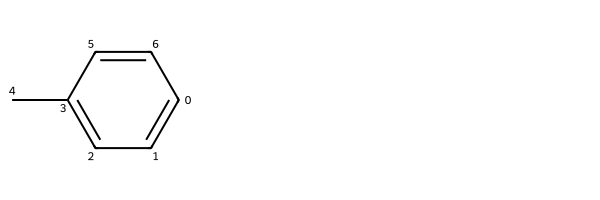

In [ ]:
# C1(=CC=CC=C1)C
# set SMILES for toluene
smiles = "c1ccc(C)cc1"
# Convert to RDkit molecule
mol = Chem.MolFromSmiles(smiles)
# Draw the structure
Draw.MolsToGridImage([mol])

he structure generated has implicit hydrogen atoms. We will need explicit hydrogen atoms to generate the input structure


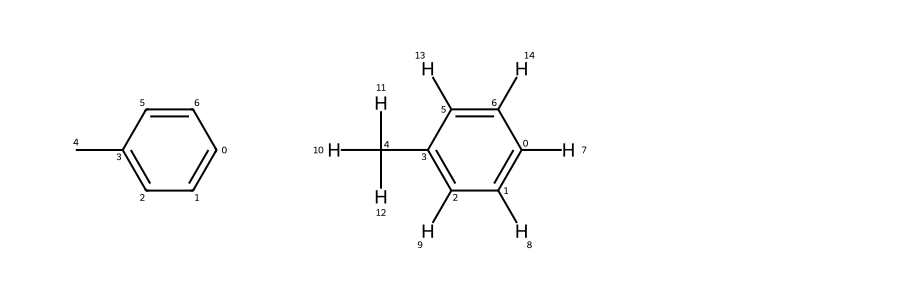

In [ ]:
# Add hydrogens
mol_h = Chem.AddHs(mol)
# Display both structures (without H) and (with H)
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300, 300))

for quantum calculations we need 3D structures because DFT modelusing x,y,z coordnates


In [ ]:
# The current molecule has z = 0 for all atoms
# this is 2D molecule (x, y) z=0
print(Chem.MolToMolBlock(mol_h))
# only first colum=x(1.5....) and second=y(0.00, -1.2990...) has values, z=0 third column=(0,000, 000...)


     RDKit          2D

 15 15  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0

Now create 3D structure

In [ ]:
# Let us make it 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(mol_h)
# look at the molecule again
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
   -2.0966    0.0369   -0.1978 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3572    1.2011   -0.1586 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0172    1.1797   -0.0330 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7242   -0.0101    0.0601 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2014   -0.0352    0.1953 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0222   -1.1710    0.0203 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3959   -1.1482   -0.1053 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1749    0.0551   -0.2964 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8719    2.1639   -0.2288 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6184    2.0823   -0.0001 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7213   -0.1556   -0.7780 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5975    0.8839    0.6656 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.4893   -0.8693    0.8988 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5006   -2.1268    0

#PFAS (6:2 Fluorotelomer sulfonate)
https://www.wikidata.org/wiki/Q27063662

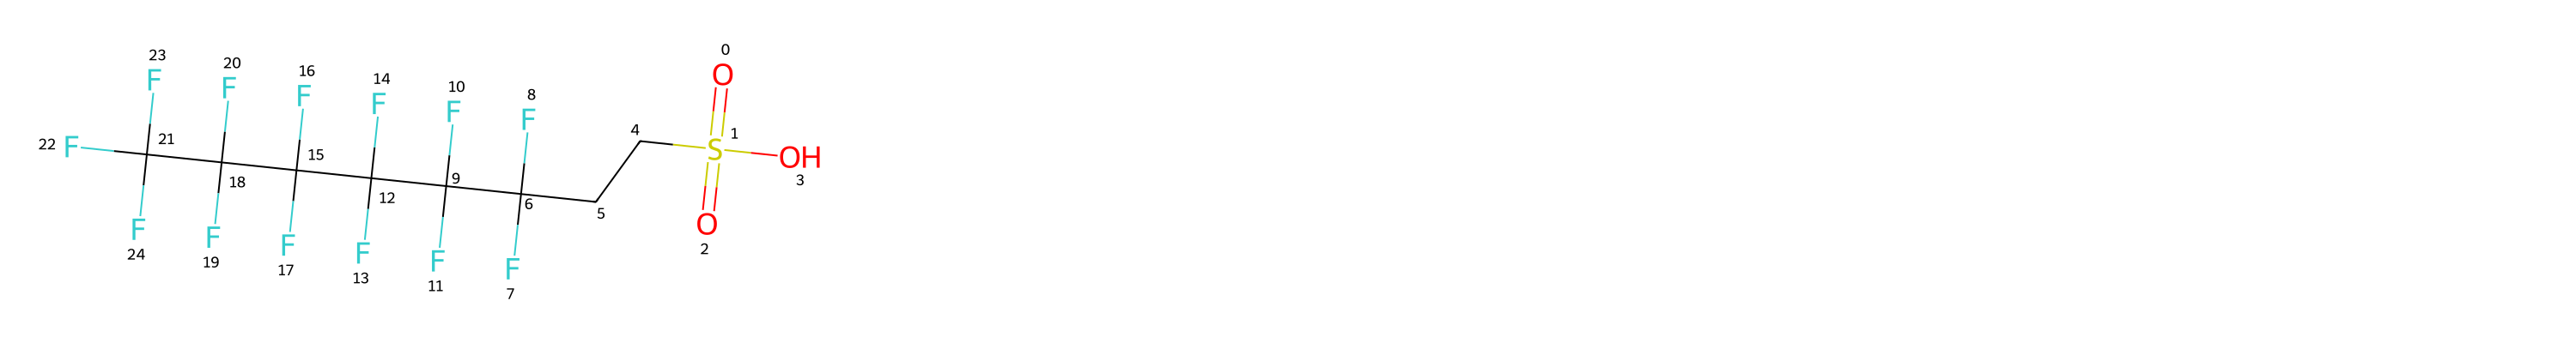

In [ ]:
# SMILES of
smile_pfas = "O=S(=O)(O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F"
# convert to RDkit molecule
mol_pfas = Chem.MolFromSmiles(smile_pfas)
# Draw the structure
Draw.MolsToGridImage([mol_pfas], subImgSize=(1000, 400))


[01:43:49] Molecule does not have explicit Hs. Consider calling AddHs()


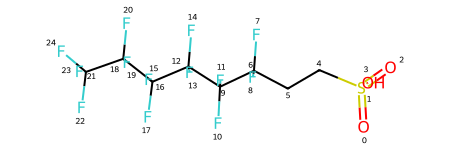

In [ ]:
Chem.AllChem.EmbedMolecule(mol_pfas)
Chem.MolToXYZFile(mol_pfas, "fluorotelomer_sulfonate.xyz")
mol_pfas

In [ ]:
print(Chem.MolToMolBlock(mol_pfas))


     RDKit          3D

 25 24  0  0  0  0  0  0  0  0999 V2000
    4.1497   -1.7465   -1.0792 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.8827   -0.7863   -0.1998 S   0  0  0  0  0  0  0  0  0  0  0  0
    6.2835   -0.6714   -0.8132 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.0234   -1.3568    1.3767 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.2028    0.8284   -0.2287 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8718    0.9900    0.3673 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7416    0.2066   -0.2200 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8663   -1.1410   -0.1857 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.5513    0.6394   -1.5311 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.4820    0.6871    0.5178 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5570    0.4685    1.8680 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.4002    2.0400    0.2847 F   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7445   -0.0661   -0.0078 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7730    0.2562   -1

In [ ]:
# import the package
from pyscf import gto, scf

# reading the xyz into PSI4 - first open the file the pass it to PSI4
#mol_pfs_eng = gto.M(atom="fluorotelomer_sulfonate.xyz")
# set basis set
#mol_pfs_eng.basis = "3-21G"

# set the functional
#mf_p = mol_pfs_eng.KS()
#mf_p.xc = 'b3lyp'
#mf_p.kernel()

# TESTING

In [ ]:
# Save the molecule in XYZ format for future use
Chem.MolToXYZFile(mol_h, 'touene.xyz')

Conformer generation is an active area of research.

https://www.rdkit.org/UGM/2012/Ebejer_20110926_RDKit_1stUGM.pdf
https://pubs.acs.org/doi/10.1021/acs.jcim.0c00025

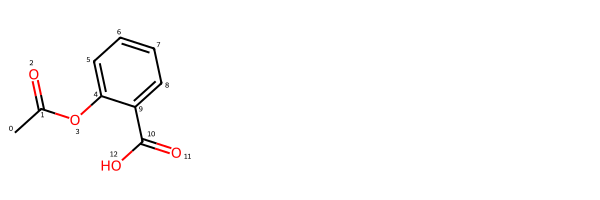

In [ ]:
# Aspirin.xyz structure
smile_asp ="CC(=O)OC1=CC=CC=C1C(=O)O"
# convert to RDkit molecule
mol_asp = Chem.MolFromSmiles(smile_asp)
# Draw the stucture
Draw.MolsToGridImage([mol_asp])



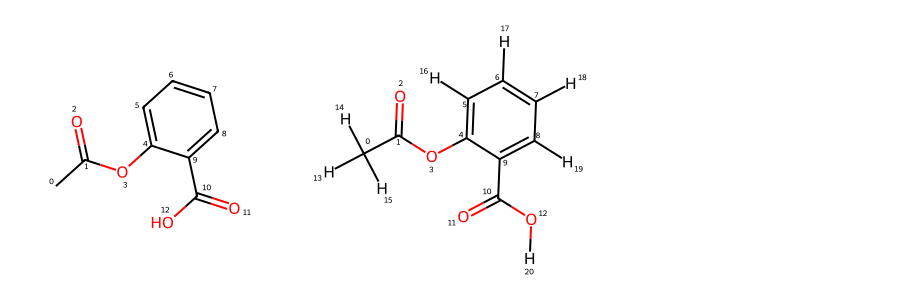

In [ ]:
#Add hydrogens
mol_asp_h = Chem.AddHs(mol_asp)
# Display both structures (without H) and (with H)
Draw.MolsToGridImage([mol_asp, mol_asp_h], subImgSize=(300, 300))





In [ ]:
# The current molecule has z = 0 for all atoms
# this is 2D molecule (x, y) z=0
print(Chem.MolToMolBlock(mol_h))





     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
   -2.0966    0.0369   -0.1978 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3572    1.2011   -0.1586 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0172    1.1797   -0.0330 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7242   -0.0101    0.0601 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2014   -0.0352    0.1953 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0222   -1.1710    0.0203 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3959   -1.1482   -0.1053 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1749    0.0551   -0.2964 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8719    2.1639   -0.2288 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6184    2.0823   -0.0001 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7213   -0.1556   -0.7780 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5975    0.8839    0.6656 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.4893   -0.8693    0.8988 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5006   -2.1268    0

In [ ]:
# Let us make it 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(mol_asp_h)
# look at the molecule again
print(Chem.MolToMolBlock(mol_asp_h))





     RDKit          3D

 21 21  0  0  0  0  0  0  0  0999 V2000
    2.9820    1.4397   -0.8040 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8827    0.5278   -0.3607 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1158   -0.2392    0.5945 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.6398    0.4976   -0.9528 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3085   -0.3858   -0.4646 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3820   -1.6864   -0.9487 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3451   -2.5410   -0.4347 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1972   -2.0718    0.5393 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1320   -0.7709    1.0309 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1655    0.0648    0.5057 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0363    1.4379    0.9647 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7813    1.9314    1.8537 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0752    2.2865    0.4420 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.9216    1.6026   -1

# we will use biphenyl and change the angle between two benzene rings.
* link https://pubchem.ncbi.nlm.nih.gov/compound/Biphenyl

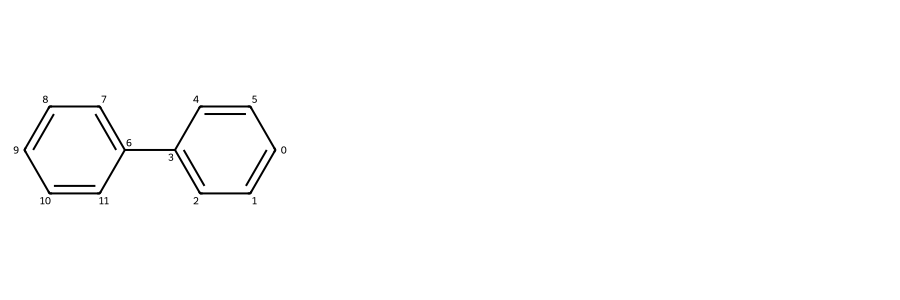

In [ ]:
# create structure for biphenyl
smiles_biph = "C1=CC=C(C=C1)C2=CC=CC=C2"
mol_biph = Chem.MolFromSmiles(smiles_biph)
#Draw structure
Draw.MolsToGridImage([mol_biph], subImgSize=(300, 300))

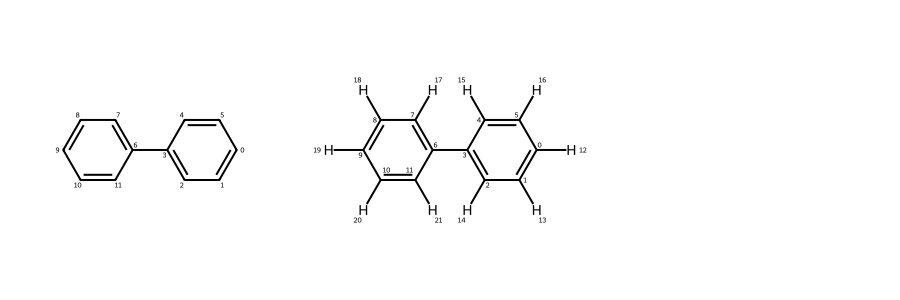

In [ ]:
# Add hydrogens
mol_biph_h = Chem.AddHs(mol_biph)
# Display both structures (without H) and (with H)
Draw.MolsToGridImage([mol_biph,mol_biph_h ], subImgSize=(300, 300))

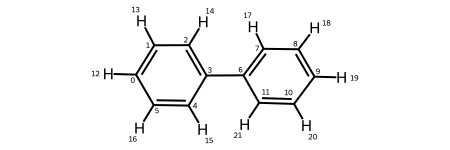

In [ ]:
Chem.AllChem.EmbedMolecule(mol_biph_h)
Chem.MolToXYZFile(mol_biph_h, "initial.xyz")
mol_biph_h


To change the dihedral angle, we need to set the value. The dihedral angle is the angle between the two planes of benzene. We need four atoms to describe the dihedral.

The syntax is

Chem.AllChem.SetDihedralDeg(conformer,a1,a2,a3,a4,value)

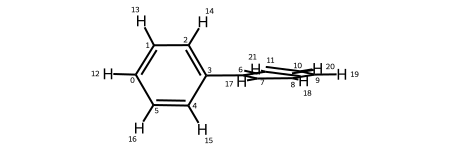

In [ ]:
# set the angle =90 degrees
Chem.AllChem.SetDihedralDeg(mol_biph_h.GetConformer(0), 4, 3, 6, 11, 90.0)
# save the new conformer
Chem.MolToXYZFile(mol_biph_h,"90.xyz")
# looks like it is et to 90
mol_biph_h


Create the 3D structure of cis-butane and trans-butene

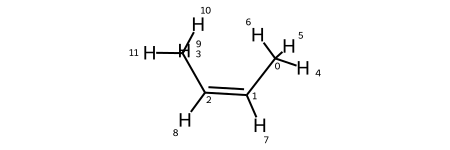

In [ ]:
smiles_cis_but = "CC=CC"
mol_cis_but = Chem.MolFromSmiles(smiles_cis_but)
mol_cis_buth = Chem.AddHs(mol_cis_but)
Chem.AllChem.EmbedMolecule(mol_cis_buth)
Chem.MolToXYZFile(mol_cis_buth, "cis_butene.xyz")


mol_cis_buth

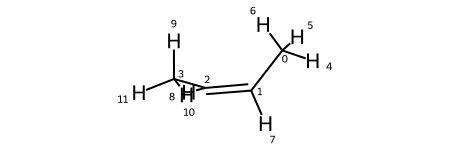

In [ ]:
# set the angle =90 degrees
Chem.AllChem.SetDihedralDeg(mol_cis_buth.GetConformer(0), 0 ,1,2,3, 95.0)
# save the new conformer
Chem.MolToXYZFile(mol_cis_buth,"trans_butene.xyz")
# looks like it is et to 90
mol_cis_buth



# Combinatorial genration
To study the effect of functional group substitution, we need to create a library of molcules replaing the functional group. We can do that with combinatorial method. We will consider benzene core and some functional groups

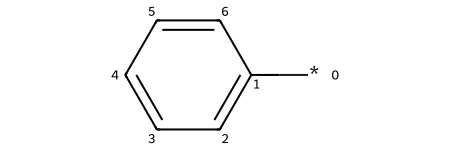

In [ ]:
# To generate the core benzene
core = Chem.MolFromSmiles("*c1ccccc1") # if you want add functional group add "*" simbol
core

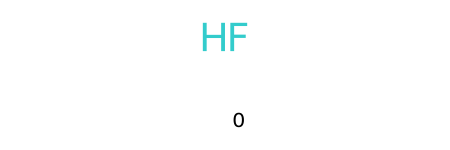

In [ ]:
# create some functional group for example "F-florine"
functional_group = "F"
functional_mol = Chem.MolFromSmiles(functional_group)
functional_mol

Next we need add functional_group to the core  

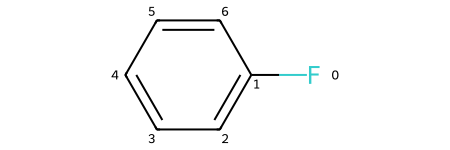

In [ ]:
product = Chem.ReplaceSubstructs(core, Chem.MolFromSmarts('[#0]'),functional_mol)
new_smiles = Chem.MolToSmiles(product[0])
new_mol = Chem.MolFromSmiles(new_smiles)
new_mol

# Do a multiple functional groups

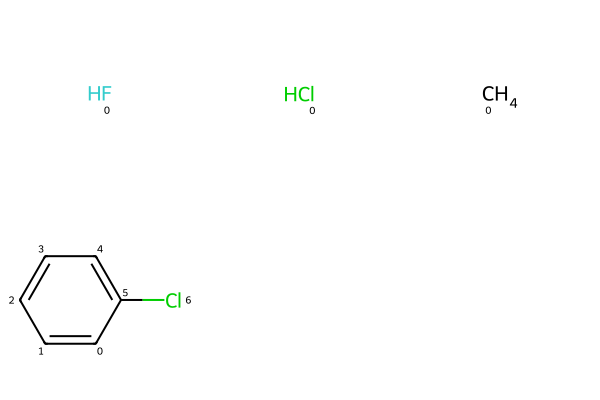

In [ ]:
# create a list of functional groups
functional_groups = ['F', 'Cl', 'C', 'c1ccccc1Cl']
# list comprehenstion
functional_mols = [Chem.MolFromSmiles(group) for group in functional_groups]

# Draw the groups
Draw.MolsToGridImage(functional_mols)

# We can draw all variation of functional groups


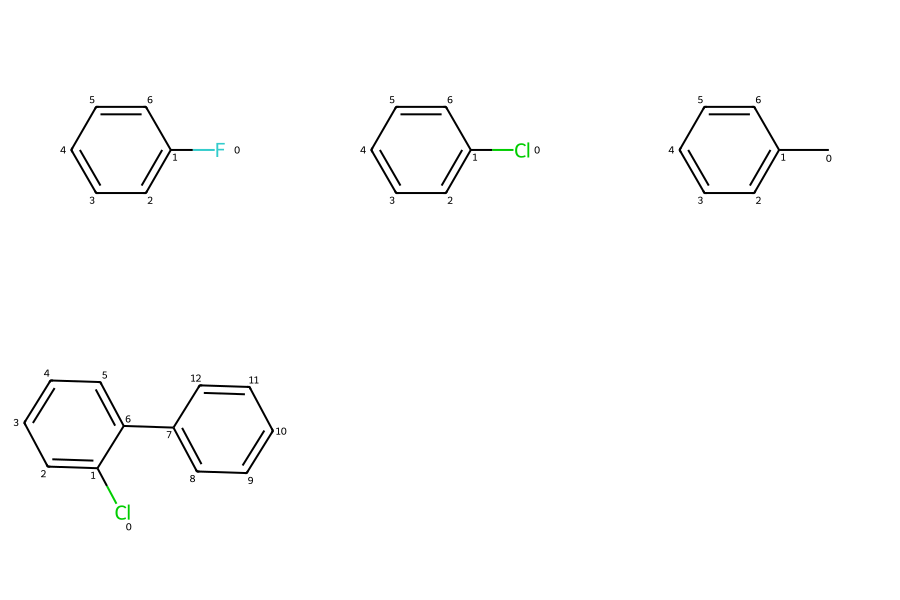

In [ ]:
product_smi = [] # empty accumulation List
for functional_mol in functional_mols:
  product_mol = Chem.ReplaceSubstructs(core, Chem.MolFromSmarts('[#0]'),functional_mol)
  product_smi.append(Chem.MolToSmiles(product_mol[0]))
# add parameter as list
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi], subImgSize=(300, 300))

# TRunning DFT calculations
We will use PySCF which is open-source software for running quantum chemistry calculations. You can find more details here - https://pyscf.org/

More tutorials and example files for PySCF are available at https://github.com/pyscf/pyscf/tree/master/examples

In [ ]:
from pyscf import gto, scf

We need a 3D structure input to PSI4. Then we set other parameters - DFT functional, basis set, charge. Details about the parametrs will be discussed in the next session.

In [ ]:
# reading the xyz into PSI4 - first open the file the pass it to PSI4
mol = gto.M(atom="touene.xyz")


In [ ]:
# set basis set
mol.basis = "3-21G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp' # exchange correlation function

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [ ]:
# run calculations to get total energy in Hartree units
mf.kernel()


converged SCF energy = -268.249711620893


-268.24971162089275

# Second step
# DFT Basics - SCF, Optimization, Frequency.

In [ ]:
! pip install geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.1/429.1 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for geometric: filename=geometric-1.0.1-py3-none-any.whl size=445145 sha256=973cb0bf26f6f62c8da853e268839c12487e9a26fff3e6ab36abf7120fbdc9e7
  Stored in directory: /root/.cache/pip/wheels/1d/e8/a2/f21341a562a7245943dfbf758934653695345e177a0989a509
Successfully built geometric


In [ ]:
# import this definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True



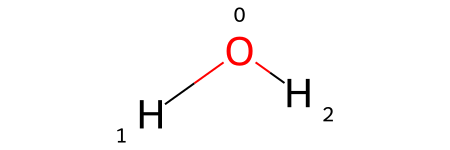

In [ ]:
# generate the water molecule "O" smile structure
smiles = "O"
# create structure of molecul
mol = Chem.MolFromSmiles(smiles)
# add the Hydrogens to the structure
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.AllChem.SetBondLength(mol.GetConformer(0), 0, 1, 1.5) # for demonstration
Chem.MolToXYZFile(mol, "water.xyz")
mol

In [ ]:
from pyscf import gto, scf

#load the molecule
mol = gto.M(atom = "water.xyz")

#set bsis-set
mol.basis="sto3g"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'
# run the energy claculations

mf.kernel()

converged SCF energy = -75.2242637490666


-75.22426374906658

# Understanding basis set
We used STO-3G basis set in the previous cell. In this section let us understand what STO-3G means. The cell below has the helper functions for plotting.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf.gto.basis import load

In [ ]:
def plot_primitive_gaussian(alpha, label=None):
  # set the range for r
  r = np.arange(-5,5,0.1) # from -5 to 5 step=0.1
  # gaussian function simplistic view
  g = np.exp(-alpha*r*r)
  # plot
  plt.plot(r,g, label=label)

def plot_contracted_gaussian(contracted_gaussians, label="contracted"):
  # set the range for r
  r = np.arange(-5,5,0.1) # from -5 to 5 step=0.1
  # add the gaussians
  gs = np.zeros_like(r)
  # loop through the contructed gaussians
  for i in range(1, len(contracted_gaussians[0])):
    gs = np.add(gs, contracted_gaussians[0][i][1]*np.exp(-contracted_gaussians[0][i][0]*r*r))

  #normaloze
  gs = gs/np.max(gs)

  # plot
  plt.plot(r,gs, 'o', label=label)


def plot_slater():
  #set the range for r
  r = np.arange(-5,5,0.1)

  #slater function
  slater_1s = (1/np.sqrt(np.pi))*np.exp(-abs(r))
  slater_1 = slater_1s/np.max(slater_1s)
  plt.plot(r,slater_1s,'*', label="slater")

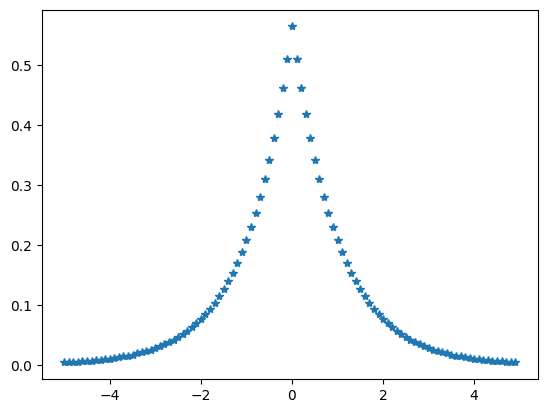

In [ ]:
# the 1s Slater function
plot_slater()





In [ ]:
load('sto3g', 'H') # the first raw =0 for angular momentum = 0

[[0,
  [3.42525091, 0.15432897],
  [0.62391373, 0.53532814],
  [0.1688554, 0.44463454]]]

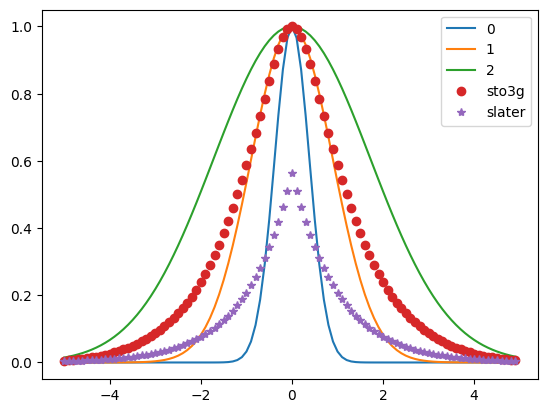

In [ ]:
# let's plot gaussian function and compare with slauter functions
plot_primitive_gaussian(alpha=3.42525091, label=0)
plot_primitive_gaussian(alpha=0.62391373,label=1)
plot_primitive_gaussian(alpha=0.1688554,label=2)

#plot_contracted_gaussian function
plot_contracted_gaussian(load('sto3G', 'H'), label='sto3g')

#plot slater
plot_slater()

#plot legends
plt.legend()

In [ ]:
load('sto3g', 'C') # 1s 2s 2l orbutals

[[0,
  [71.616837, 0.15432897],
  [13.045096, 0.53532814],
  [3.5305122, 0.44463454]],
 [0,
  [2.9412494, -0.09996723],
  [0.6834831, 0.39951283],
  [0.2222899, 0.70011547]],
 [1,
  [2.9412494, 0.15591627],
  [0.6834831, 0.60768372],
  [0.2222899, 0.39195739]]]

n 3-21G basis set, we use 3 gaussians for core-shell (1s) and 2 gaussians for valence short-range and 1 gaussian for valence long-range (2s, 2p). Such a basis set is a double-zeta (DZ) basis set or split-valence (SV) basis set.



In [ ]:
load("3-21g",'C')

[[0, [172.256, 0.0617669], [25.9109, 0.358794], [5.53335, 0.700713]],
 [0, [3.66498, -0.395897], [0.770545, 1.21584]],
 [0, [0.195857, 1.0]],
 [1, [3.66498, 0.23646], [0.770545, 0.860619]],
 [1, [0.195857, 1.0]]]

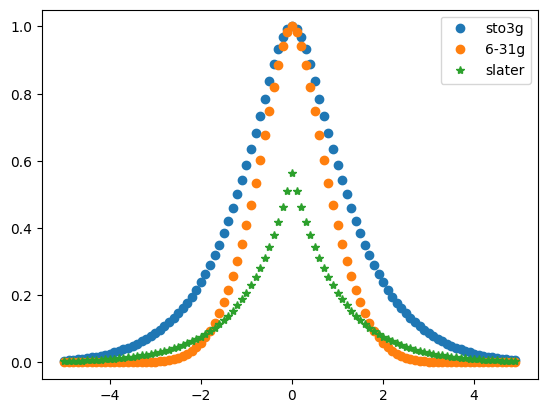

In [ ]:
# comparing STO-3G and 6-31G for Hydrogen 1s orbitalload("3-21g",'C')
plot_contracted_gaussian(load('sto3g', 'H'), label="sto3g")
plot_contracted_gaussian(load('6-31G', 'H'), label="6-31g")

plot_slater()
plt.legend()

In [ ]:
# The valence orbitals can be represented by zetas - triple zeta (TZ), quadraple zeta (QZ) ...

# 6-311G is an example of triple zeta basis set

In [ ]:
load("6-311g",'C')

[[0,
  [4563.24, 0.00196665],
  [682.024, 0.0152306],
  [154.973, 0.0761269],
  [44.4553, 0.260801],
  [13.029, 0.616462],
  [1.82773, 0.221006]],
 [0, [20.9642, 0.11466], [4.80331, 0.919999], [1.45933, -0.00303068]],
 [0, [0.483456, 1.0]],
 [0, [0.145585, 1.0]],
 [1, [20.9642, 0.0402487], [4.80331, 0.237594], [1.45933, 0.815854]],
 [1, [0.483456, 1.0]],
 [1, [0.145585, 1.0]]]

In cases were polarization (p/*) is needed, you can add gaussian functions of higher angular momemtum. For p-orbital you can add d-functions

In [ ]:
load("6-31g*",'C')

[[0,
  [3047.5249, 0.0018347],
  [457.36951, 0.0140373],
  [103.94869, 0.0688426],
  [29.210155, 0.2321844],
  [9.286663, 0.4679413],
  [3.163927, 0.362312]],
 [0, [7.8682724, -0.1193324], [1.8812885, -0.1608542], [0.5442493, 1.1434564]],
 [0, [0.1687144, 1.0]],
 [1, [7.8682724, 0.0689991], [1.8812885, 0.316424], [0.5442493, 0.7443083]],
 [1, [0.1687144, 1.0]],
 [2, [0.8, 1.0]]]

To add polarization to Hydrogen atoms, you need **

In [ ]:
# '*' does not add p-functions to s
load("6-31g*",'H')


[[0, [18.731137, 0.0334946], [2.8253937, 0.23472695], [0.6401217, 0.81375733]],
 [0, [0.1612778, 1.0]]]

In [ ]:
# '**' does not add p-functions to s
load("6-31g**",'H')

[[0, [18.731137, 0.0334946], [2.8253937, 0.23472695], [0.6401217, 0.81375733]],
 [0, [0.1612778, 1.0]],
 [1, [1.1, 1.0]]]

https://www.basissetexchange.org/

In [ ]:
from pyscf.geomopt.geometric_solver import optimize
# create the pyscf molecule
mol_ex = gto.M(atom="water.xyz")

# set basis set
mol_ex.basis = "sto3g"

# set the functional
mf = mol_ex.KS()
mf.xc='b3lyp'

# run optimize()
mol_eq = optimize(mf)

geometric-optimize called with the following command line:
/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-8510f1fb-480c-45f8-b2d2-a008997b3218.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000207   0.386407   0.000000    0.000000  0.000000  0.000000
   H  -1.220671  -0.485640   0.000000    0.000000  0.000000  0.000000
   H   0.811747  -0.193099   0.000000    0.000000  0.000000  0.000000
converged SCF energy = -75.2242637490666
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 O     0.1397238591     0.0119692921     0.0000000000
1 H    -0.1184948069    -0.0616750759    -0.0000000000
2 H    -0.0212308755     0.0497127169     0.0000000000
----------------------------------------------
cycle 1: E = -75.2242637491  dE = -75.2243  norm(grad) = 0.201079


Step    0 : Gradient = 1.161e-01/1.402e-01 (rms/max) Energy = -75.2242637491
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.00000e-01 1.00000e-01 4.81225e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.064103   0.400478  -0.000000   -0.063896  0.014071 -0.000000
   H  -1.085893  -0.453653  -0.000000    0.134778  0.031987 -0.000000
   H   0.740873  -0.239188  -0.000000   -0.070874 -0.046089 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -75.2730272253932
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 O     0.1028070052     0.0540202982     0.0000000000
1 H    -0.1048974900    -0.0721150746     0.0000000000
2 H     0.0020909424     0.0181035770     0.0000000000
----------------------------------------------
cycle 2: E = -75.2730272254  dE = -0.0487635  norm(grad) = 0.173273


Step    1 : Displace = 1.010e-01/1.385e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.000e-01/1.273e-01 (rms/max) E (change) = -75.2730272254 (-4.876e-02) Quality = 1.088
Hessian Eigenvalues: 2.62335e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 1.45741e-01 6.41467e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.172864   0.362107  -0.000000   -0.108761 -0.038372 -0.000000
   H  -0.887458  -0.378786  -0.000000    0.198435  0.074867 -0.000000
   H   0.651185  -0.275760  -0.000000   -0.089688 -0.036573 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -75.3225593612716
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 O    -0.0097932512     0.0111692675    -0.0000000000
1 H     0.0007654502    -0.0018712290    -0.0000000000
2 H     0.0090239960    -0.0092956383     0.0000000000
----------------------------------------------
cycle 3: E = -75.3225593613  dE = -0.0495321  norm(grad) = 0.0198139


Step    2 : Displace = 1.502e-01/2.121e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 1.144e-02/1.485e-02 (rms/max) E (change) = -75.3225593613 (-4.953e-02) Quality = 0.699
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.35548e-01 2.25540e-01 6.45283e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.169958   0.356721  -0.000000    0.002906 -0.005386  0.000000
   H  -0.887904  -0.377527   0.000000   -0.000446  0.001258  0.000000
   H   0.648853  -0.271700  -0.000000   -0.002331  0.004060  0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -75.3227495863213
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 O    -0.0040846601     0.0032771951    -0.0000000000
1 H     0.0009374389    -0.0000118763    -0.0000000000
2 H     0.0031427533    -0.0032627567     0.0000000000
----------------------------------------------
cycle 4: E = -75.3227495863  dE = -0.000190225  norm(grad) = 0.00698755


Step    3 : Displace = 4.507e-03/6.152e-03 (rms/max) Trust = 1.414e-01 (=) Grad = 4.034e-03/5.237e-03 (rms/max) E (change) = -75.3227495863 (-1.902e-04) Quality = 1.342
Hessian Eigenvalues: 4.99997e-02 5.00000e-02 5.00000e-02 ... 1.35743e-01 2.27104e-01 4.24522e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.167007   0.354687   0.000000    0.002951 -0.002034  0.000000
   H  -0.889749  -0.377828   0.000000   -0.001846 -0.000301  0.000000
   H   0.647969  -0.269488   0.000000   -0.000884  0.002212  0.000000
converged SCF energy = -75.3227712808317
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 O     0.0017954712     0.0008778970     0.0000000000
1 H    -0.0012631942    -0.0012837206    -0.0000000000
2 H    -0.0005368336     0.0004083481     0.0000000000
----------------------------------------------
cycle 5: E = -75.3227712808  dE = -2.16945e-05  norm(grad) = 0.00277362


Step    4 : Displace = 2.708e-03/3.505e-03 (rms/max) Trust = 2.000e-01 (+) Grad = 1.601e-03/1.999e-03 (rms/max) E (change) = -75.3227712808 (-2.169e-05) Quality = 0.754
Hessian Eigenvalues: 4.99976e-02 5.00000e-02 5.00000e-02 ... 1.27981e-01 2.61928e-01 4.87754e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.168214   0.353306   0.000000   -0.001207 -0.001381 -0.000000
   H  -0.888722  -0.376788   0.000000    0.001028  0.001040  0.000000
   H   0.648292  -0.269224   0.000000    0.000322  0.000264 -0.000000
converged SCF energy = -75.3227727783574
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 O    -0.0006610537    -0.0013516010     0.0000000000
1 H     0.0007063397     0.0010343778     0.0000000000
2 H    -0.0000501430     0.0003196850    -0.0000000000
----------------------------------------------
cycle 6: E = -75.3227727784  dE = -1.49753e-06  norm(grad) = 0.00198428


Step    5 : Displace = 1.364e-03/1.770e-03 (rms/max) Trust = 2.828e-01 (+) Grad = 1.146e-03/1.505e-03 (rms/max) E (change) = -75.3227727784 (-1.498e-06) Quality = 0.261
Hessian Eigenvalues: 4.99937e-02 5.00000e-02 5.00000e-02 ... 1.48450e-01 3.80620e-01 5.05276e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.167834   0.354345   0.000000    0.000380  0.001039 -0.000000
   H  -0.888703  -0.377310   0.000000    0.000018 -0.000522 -0.000000
   H   0.647967  -0.269780  -0.000000   -0.000324 -0.000556 -0.000000
converged SCF energy = -75.3227748737083
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 O    -0.0000433524     0.0000800992    -0.0000000000
1 H     0.0000804988    -0.0000200077     0.0000000000
2 H    -0.0000417509    -0.0000576130     0.0000000000
----------------------------------------------
cycle 7: E = -75.3227748737  dE = -2.09535e-06  norm(grad) = 0.000142261


Step    6 : Displace = 7.852e-04/1.079e-03 (rms/max) Trust = 2.828e-01 (=) Grad = 8.213e-05/9.108e-05 (rms/max) E (change) = -75.3227748737 (-2.095e-06) Quality = 0.946
Hessian Eigenvalues: 4.99864e-02 5.00000e-02 5.00000e-02 ... 1.67133e-01 3.73711e-01 4.81406e-01



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.167762   0.354138   0.000000    0.000072 -0.000207  0.000000
   H  -0.889000  -0.377293   0.000000   -0.000297  0.000017  0.000000
   H   0.648334  -0.269666  -0.000000    0.000367  0.000114  0.000000
converged SCF energy = -75.3227748852883
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 O     0.0000050570     0.0000166842    -0.0000000000
1 H    -0.0000911439    -0.0000179943     0.0000000000
2 H     0.0000813803     0.0000038196     0.0000000000
----------------------------------------------
cycle 8: E = -75.3227748853  dE = -1.15801e-08  norm(grad) = 0.000124789


Step    7 : Displace = 3.025e-04/3.546e-04 (rms/max) Trust = 3.000e-01 (+) Grad = 7.205e-05/9.290e-05 (rms/max) E (change) = -75.3227748853 (-1.158e-08) Quality = 0.186
Hessian Eigenvalues: 4.99864e-02 5.00000e-02 5.00000e-02 ... 1.67133e-01 3.73711e-01 4.81406e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 10.336 seconds


In [ ]:
# save the optimized geometry for visualization
mol_eq.tofile("opt_water.xyz")

'3\nXYZ from PySCF\nO          -0.16776        0.35414        0.00000\nH          -0.88900       -0.37729        0.00000\nH           0.64833       -0.26967       -0.00000'

In [ ]:
conv_params = {
    'convergence_energy': 1e-1,  # Eh
    'convergence_grms': 3e-1,    # Eh/Bohr
    'convergence_gmax': 4.5e-1,  # Eh/Bohr
    'convergence_drms': 1.2e-1,  # Angstrom
    'convergence_dmax': 1.8e-1,  # Angstrom
}

mol_eq = optimize(mf, **conv_params)


geometric-optimize called with the following command line:
/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-8510f1fb-480c-45f8-b2d2-a008997b3218.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000207   0.386407   0.000000    0.000000  0.000000  0.000000
   H  -1.220671  -0.485640   0.000000    0.000000  0.000000  0.000000
   H   0.811747  -0.193099   0.000000    0.000000  0.000000  0.000000
converged SCF energy = -75.2242637490666
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 O     0.1397238591     0.0119692921     0.0000000000
1 H    -0.1184948069    -0.0616750759     0.0000000000
2 H    -0.0212308755     0.0497127169     0.0000000000
----------------------------------------------
cycle 1: E = -75.2242637491  dE = -75.2243  norm(grad) = 0.201079


Step    0 : Gradient = 1.161e-01/1.402e-01 (rms/max) Energy = -75.2242637491
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.00000e-01 1.00000e-01 4.81225e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.064103   0.400478  -0.000000   -0.063896  0.014071 -0.000000
   H  -1.085893  -0.453653  -0.000000    0.134778  0.031987 -0.000000
   H   0.740873  -0.239188  -0.000000   -0.070874 -0.046089 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -75.2730272253932
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 O     0.1028070052     0.0540202982    -0.0000000000
1 H    -0.1048974900    -0.0721150746     0.0000000000
2 H     0.0020909424     0.0181035770    -0.0000000000
----------------------------------------------
cycle 2: E = -75.2730272254  dE = -0.0487635  norm(grad) = 0.173273


Step    1 : Displace = 1.010e-01/1.385e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.000e-01/1.273e-01 (rms/max) E (change) = -75.2730272254 (-4.876e-02) Quality = 1.088
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.00000e-01 1.00000e-01 4.81225e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 3.236 seconds


# Frequency calculation
Running frequency calculation is one way to find out whether the optimzation reached an energy minima. Remember we only used the first derivative (gradient) for convergence check. The frequency calculations get the second derrivative (hessian) which will tell us whether it is a maxima (negative values for frequency) or minima (positive values) on the energy surface

In [ ]:
# create a molecule object
mol = gto.M(atom="opt_water.xyz")

# set basis set
mol.basis = "sto3g"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run frequency calculation
mf.run()
hessian = mf.Hessian().kernel()


converged SCF energy = -75.3227748859621


In [ ]:
from pyscf.hessian import thermo

# getting the frequncy data from the calculation
freq_info = thermo.harmonic_analysis(mf.mol, hessian)
freq_info["freq_wavenumber"]

array([2016.74296298, 3611.76000411, 3836.43589035])